In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
# #############################################################################
# Real benchmarked dataset
data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
#data = pd.read_csv('../../RealData/RealData_squid_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')




In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.1,517.21
1,1,0.1,521.33
2,2,0.1,510.55
3,3,0.1,512.59
4,4,0.1,494.36


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,800.0000,800.000000,799.000000
mean,399.5000,0.550000,1872.977497
std,231.0844,0.287408,582.130701
min,0.0000,0.100000,493.600000
25%,199.7500,0.300000,1646.180000
50%,399.5000,0.550000,2198.900000
75%,599.2500,0.800000,2228.005000
max,799.0000,1.000000,2292.680000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
Unnamed: 0    800 non-null int64
CPU           800 non-null float64
throughput    799 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.8 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


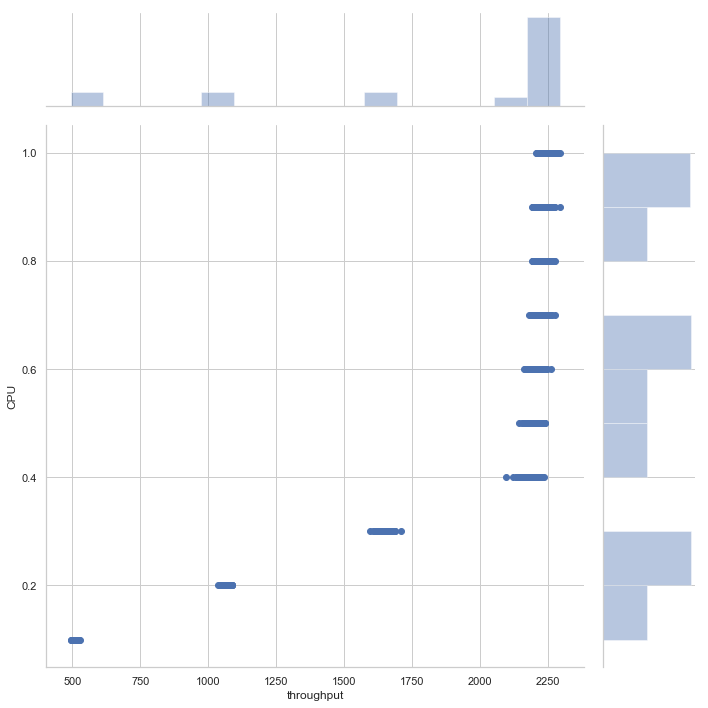

In [6]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter",height=10)


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


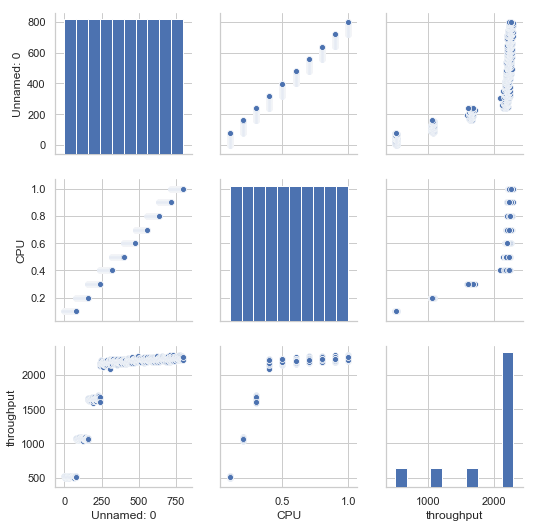

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.8032854928381647

In [9]:
datalm = data


In [10]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
#Test data prediction
prediction = rf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.013123,0.1,0.100000
1,0.015413,0.1,0.100000
2,0.009421,0.1,0.100000
3,0.000422,0.1,0.100000
4,0.002657,0.1,0.100000
5,0.010144,0.1,0.100000
6,0.012901,0.1,0.100000
7,0.000000,0.1,0.100000
8,0.011345,0.1,0.100000
9,0.010950,0.1,0.100000


MAE: 0.06723913690476199
MSE: 0.01187495606313775
RMSE: 0.10897227199218042


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


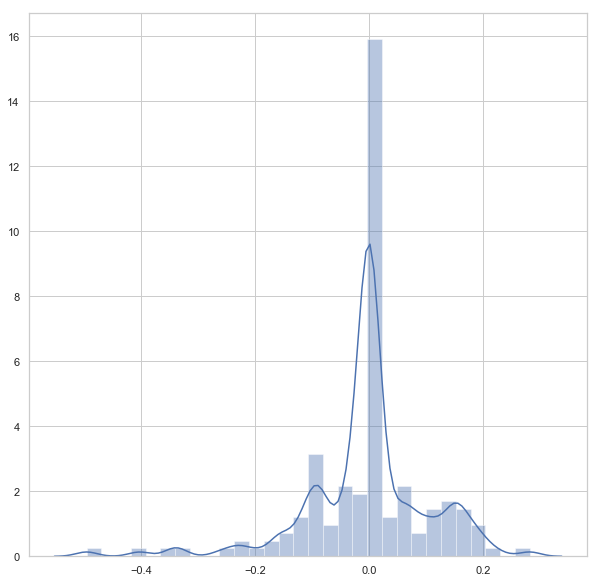

In [12]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
sns.distplot(y_test-prediction,bins=30)

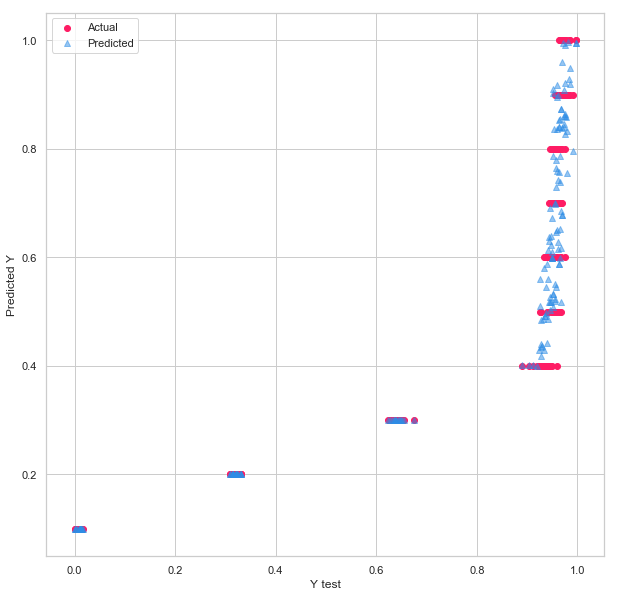

In [13]:
#Plot prediction
fig = plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test,  color='#fe1c64',label="Actual")
plt.scatter(X_test, prediction, color='#2e8de6', linewidth=1,marker='^',alpha = 0.5,label="Predicted")
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.legend()

In [14]:
# save the model to disk
filename = '../models/rf_nginx_big_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [15]:
rf.predict([[0.2243476]])

array([0.2])